# **Import the Depedencies**
*   pandas - making dataframes
*   matplotlib& seaborn - used to make graphs & plots
*   sklearn - to perform regression / classification
*   metrics - to identify outliers / errors etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Data Collection and preprocessing**

In [3]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Handling Missing values**

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Handling Duplicated Values**

In [8]:
Duplicate_Value = df.duplicated().sum()
print(f'Number of duplicated rows are = {Duplicate_Value}')

Number of duplicated rows are = 1


In [10]:
df = df.drop_duplicates()

print("Number of Duplicate values are =" ,df.duplicated().sum())

Number of Duplicate values are = 0


## **Distribution of charges**

Text(0.5, 1.0, 'Distribution of Charges')

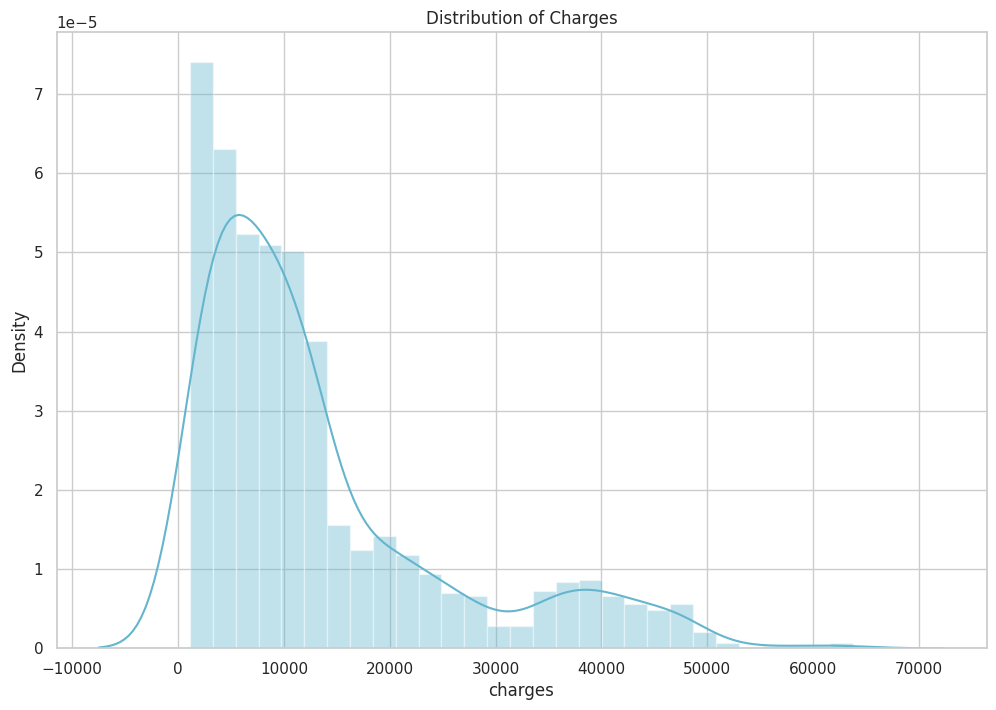

In [11]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

## **Normalizing the data**

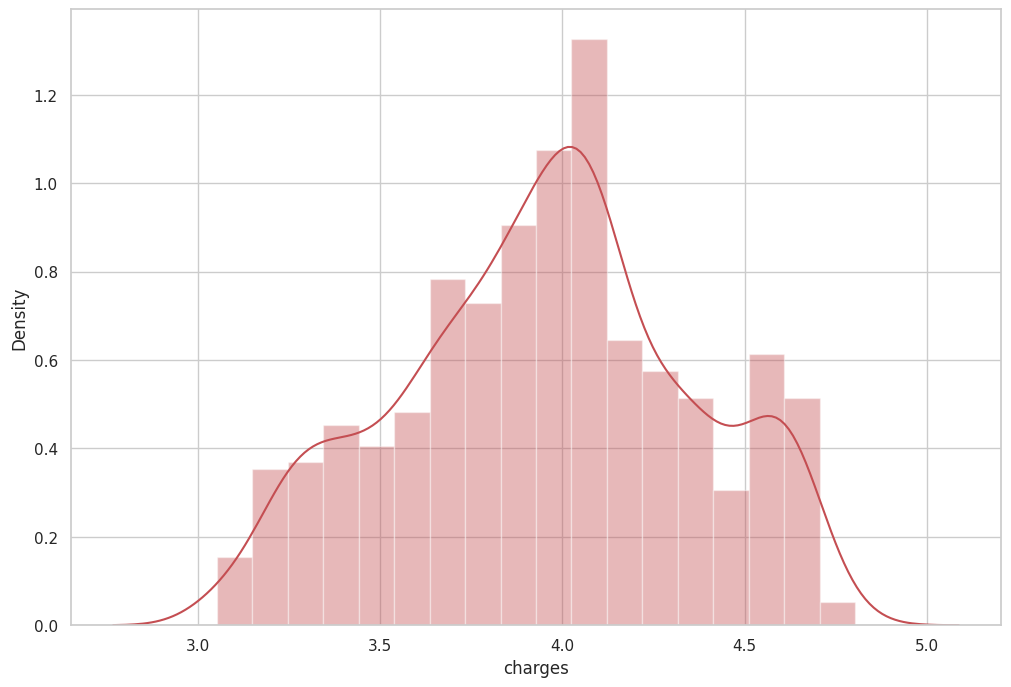

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

## **Region-wise distribution**

<Axes: xlabel='charges', ylabel='region'>

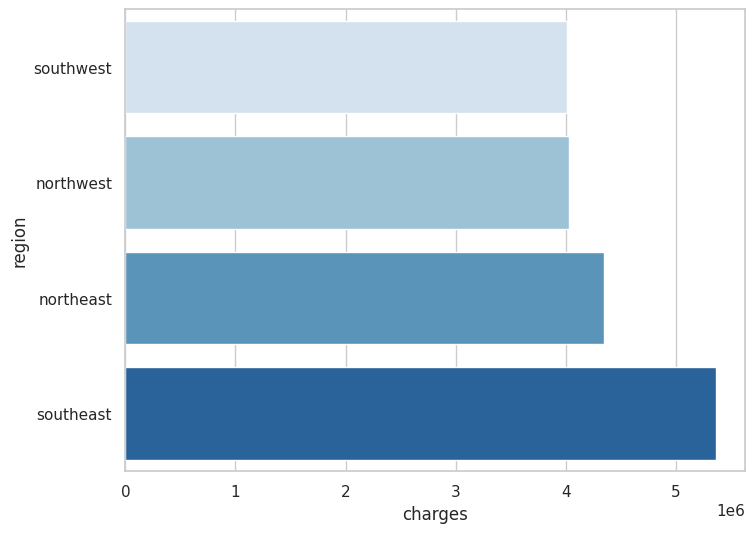

In [15]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

# Creating the bar plot
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues', ax=ax)

## **Changes due to features**

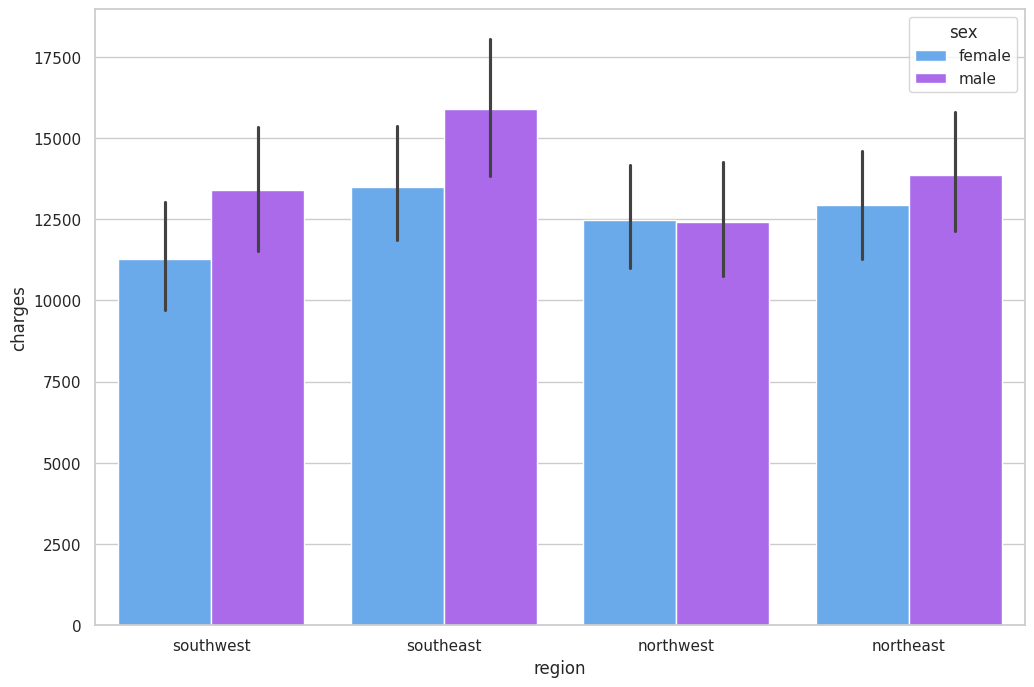

In [17]:
# **Here we will categorize based on sex**
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

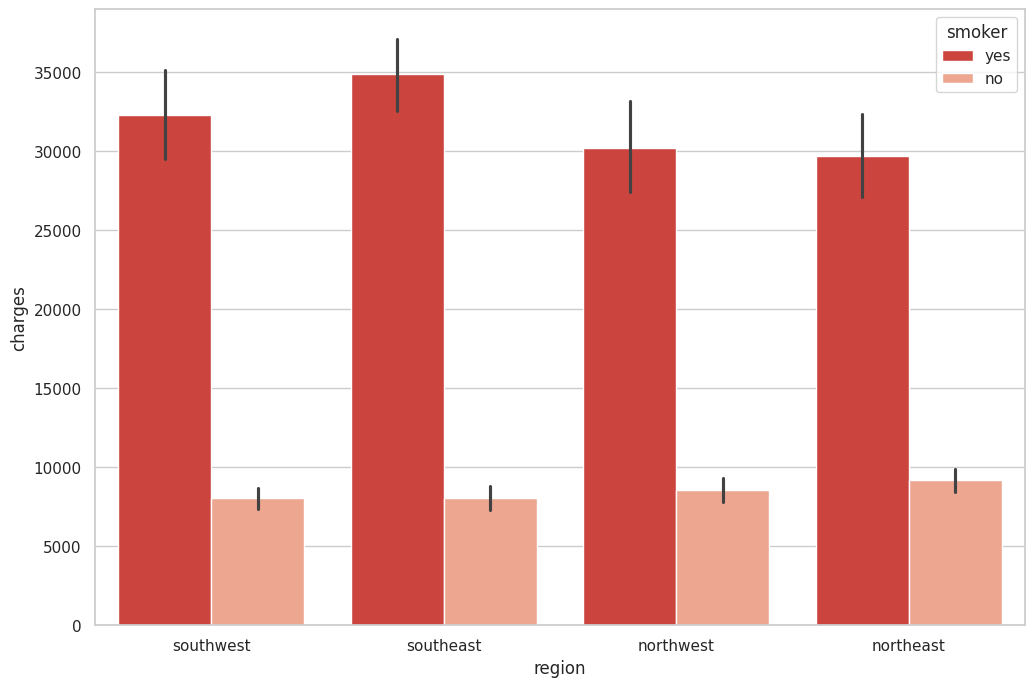

In [18]:
# Here we will categorize based on smoking
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

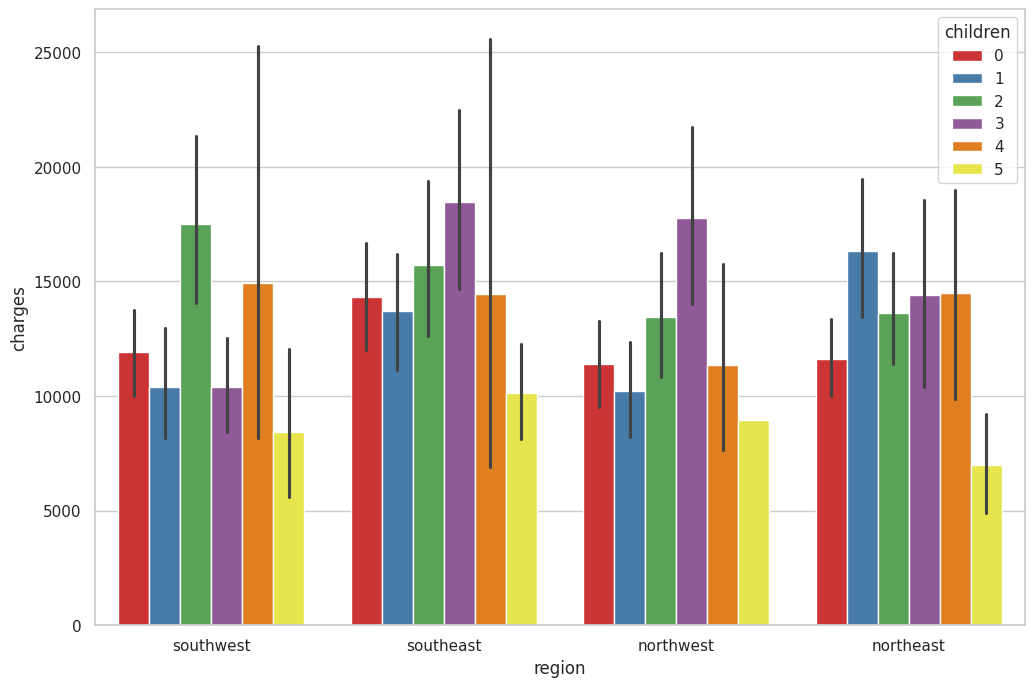

In [19]:
# Here we will be categorize based on having children
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

### **Conclusion**

#### People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

## **Analyzing Data**

<Figure size 1200x400 with 0 Axes>

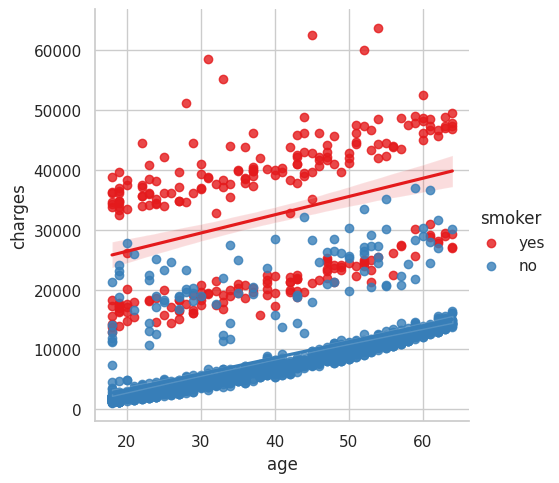

<Figure size 1200x400 with 0 Axes>

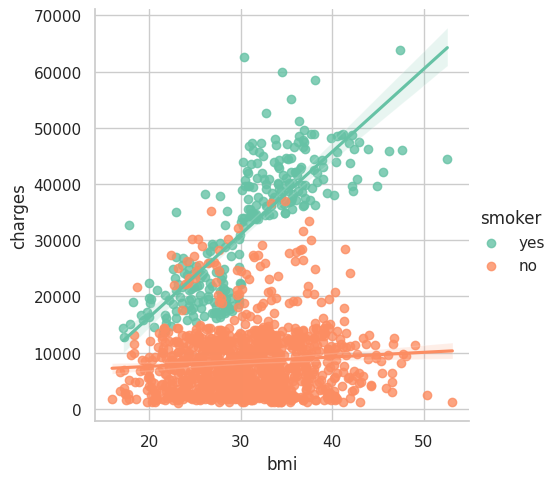

<Figure size 1200x400 with 0 Axes>

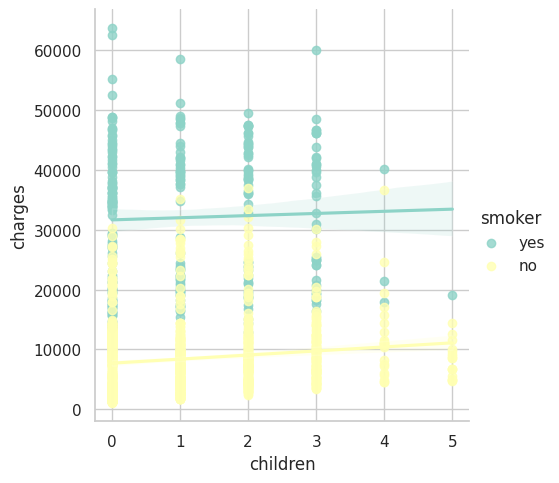

In [21]:
# analyze the medical charges by age, bmi and children according to the smoking factor

# Creating lmplot for age vs. charges
plt.figure(figsize=(12, 4))
ax1 = sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set1')
plt.subplots_adjust(wspace=0.5)  # Adjusting horizontal space between subplots

# Creating lmplot for bmi vs. charges
plt.figure(figsize=(12, 4))
ax2 = sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set2')
plt.subplots_adjust(wspace=0.5)  # Adjusting horizontal space between subplots

# Creating lmplot for children vs. charges
plt.figure(figsize=(12, 4))
ax3 = sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='Set3')
plt.subplots_adjust(wspace=0.5)  # Adjusting horizontal space between subplots

plt.show()

### **Conclusion**

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children.

## **Categorical Data Conversion**

In [22]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


## **LabelEncoder**

In [23]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

## **Checking for multicollinearity**

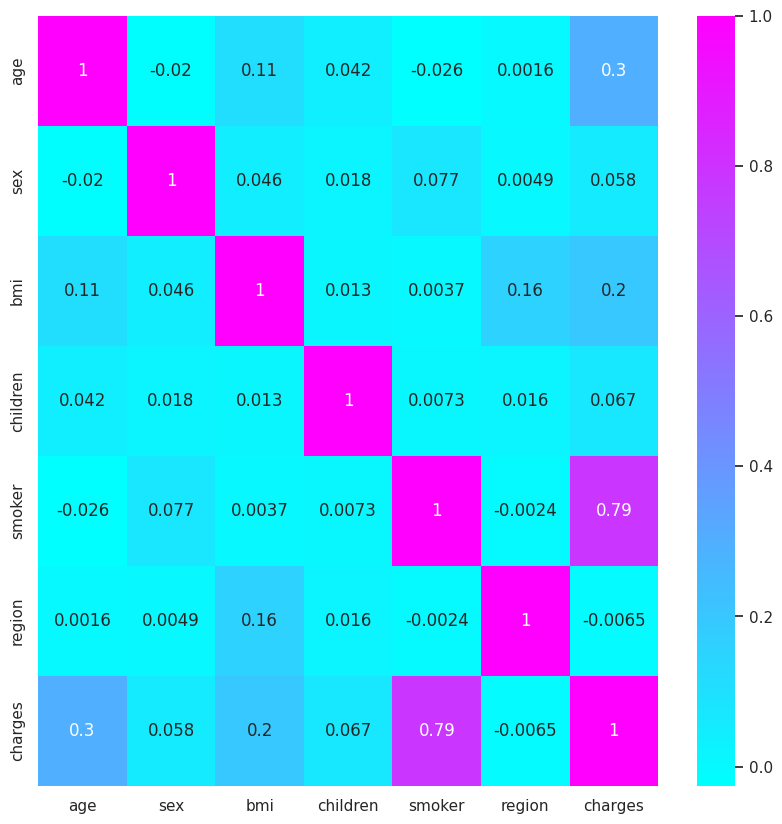

In [26]:
"""Values above 0.75 (or below -0.75) indicate strong correlation between variables.
These values are more likely to lead to multicollinearity issues in regression analysis."""
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

Smoking closely related to many features

# **Model Selection**

Select the best model which gives good score

## **Linear Regression**

In [27]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-10658.974155442047
[  244.40254189  -203.81680641   308.01805142   495.56546634
 23771.78167483  -377.96465113]
0.7526726290709553


## **Ridge Regression**

In [28]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-10641.314091338605
[  244.34042397  -201.10723643   307.92303881   495.90249348
 23702.74866396  -377.99799347]
0.7526240353110314


## **Lasso Regression**

In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and fit the Lasso model
lasso_model = Lasso(alpha=0.2, fit_intercept=True, max_iter=1000, tol=0.0001, random_state=None, selection='cyclic')
lasso_model.fit(x_train_scaled, y_train)

# Print the intercept, coefficients, and R^2 score
print("Intercept:", lasso_model.intercept_)
print("Coefficients:", lasso_model.coef_)
print("R^2 score:", lasso_model.score(x_test_scaled, y_test))

Intercept: 13083.49369442376
Coefficients: [3446.61532315 -101.68184398 1868.41722699  595.25928728 9544.9951613
 -418.87543797]
R^2 score: 0.752669480134209


## **Random Forest Regressor**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

x = df.drop(['charges'], axis=1)
y = df.charges

Rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)
Rfr.fit(x_train, y_train)

x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' %
      (mean_squared_error(y_train, x_train_pred),
       mean_squared_error(y_test, x_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' %
      (r2_score(y_train, x_train_pred),
       r2_score(y_test, x_test_pred)))

MSE train data: 3342536.635, MSE test data: 27301132.995
R2 train data: 0.976, R2 test data: 0.838


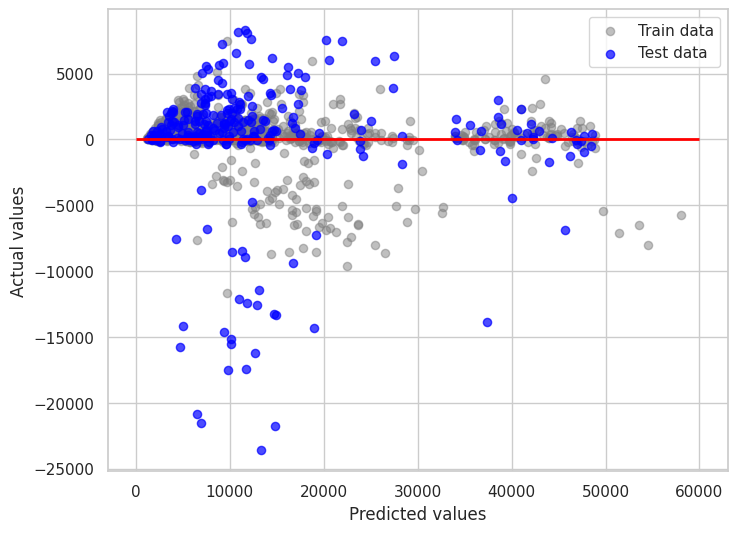

In [34]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.629024)
2.bmi(0.206035)
3.age(0.128738)
4.children(0.017091)
5.region(0.013517)
6.sex(0.005595)


<BarContainer object of 6 artists>

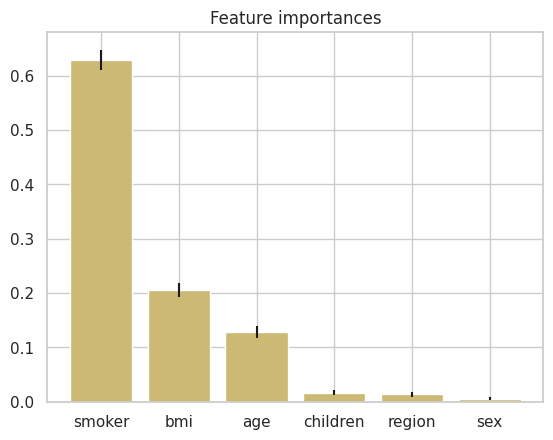

In [35]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

Let's drop the region and sex as they are insignificant

## **Polynomial Regression**

In [36]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-4154.172427990743
[ 0.00000000e+00  4.58324545e-01  4.03405523e+02  1.40260553e+03
 -1.12260916e+04  3.01311573e+00  3.24610178e-01 -5.35321284e-01
  2.51089226e+01 -6.58358646e+00 -8.22584809e+00  1.48200077e+03
 -1.41284021e+02 -3.75316527e+01 -1.12260916e+04]
0.8357482955959807


## **Conclusion**

Polynomial regression model gives the best score

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3175.8186596347946
Mean Squared Error: 27631993.106147405
Root Mean Squared Error: 5256.6142245886185


In [38]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
1248,1633.96180,2687.454432
610,8547.69130,10135.037321
393,9290.13950,10754.902954
503,32548.34050,26162.873761
198,9644.25250,9141.656812
...,...,...
809,3309.79260,5013.664929
726,6664.68595,8460.233673
938,2304.00220,4822.210691
474,25382.29700,29294.007454


# **Project Conclusion**

To give a good model for the prediction, we followed:
*   Data Collection
*   Data Preprocessing
*   Feature Engineering
*   Model Selection
*   Model performance Evaluation

and Polynomial regression model has given better performance score

